# Código de Lucas Lattari do Canal Universo discreto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def fillMissingData (X, column):
  from sklearn.impute import SimpleImputer
  imputer = SimpleImputer(missing_values=np.nan, strategy="median")
  X[:, column:column + 1] = imputer.fit_transform(X[:, column:column + 1])
  return X

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MBA USP/Cluster_Python-estudos_independentes/svbr.csv', delimiter=';')
df.head(30)

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0
6,Delta T - Os super lentos,12000.0,171361.0
7,Bláblálogia,161951.0,11027386.0
8,Efarsas,78876.0,6226235.0
9,Minuto da Terra,274196.0,30166457.0


In [4]:
#pré-processamento
#convertendo valores da coluna 1 para int apenas por quatões estéticas
df_numpy = fillMissingData(df.to_numpy(), 1)
df_numpy[:, 1] = df_numpy[:, 1].astype("int")
df_numpy = fillMissingData(df_numpy, 2)
df_numpy[:, 2] = df_numpy[:, 2].astype("int")

#atualiza peixe babel
df.at[28, 'Inscritos'] =  df_numpy[28][1]
df.at[28, 'Visualizações'] =  df_numpy[28][2]

#converte inscritos e visualizações para inteiro no pandas
#df.Inscritos = df.Inscritos.astype("int")

#Criação de um novo dataframe apenas com valores de Inscritos e Visualizações
X = pd.DataFrame({'Inscritos': df_numpy[:, 1], 'Visualizações': df_numpy[:, 2]})
X.head()


,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


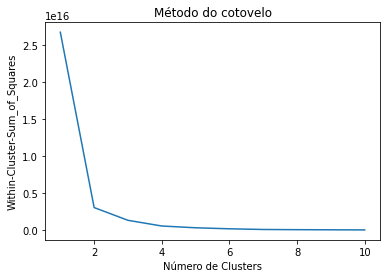

In [5]:
wcss = []
for i in range(1, 11):
  #max_iter: quantas vezes será computado a troca de cluster das amostras
  #n_init: n de vezes em que o k-mens é executado, até o melhor resultado (wcss menor possivel)
  kmeans = KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10)  
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) #inertia_ é na verdade o wcss que o kmens do sklearn computou


plt.plot(range(1, 11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Within-Cluster-Sum_of_Squares')
plt.show()


## K2

In [6]:
kmeans = KMeans(n_clusters= 2, init='k-means++', max_iter=300, n_init=10)  
clusters = kmeans.fit_predict(X)
clusters


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [7]:
df['Cluster'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0


In [8]:
boolarray = df['Cluster'] == 1
df[boolarray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056.0,93036517.0,1
32,Canal do Pirula,752573.0,76462787.0,1
39,Schwarza - Poligonautas,860493.0,118741623.0,1


In [9]:
boolarray = df['Cluster'] == 0
df[boolarray]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
9,Minuto da Terra,274196.0,30166457.0,0


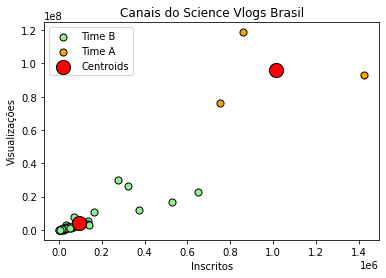

In [10]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='Time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='Time A'
)

# plot the centroids

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red',
    edgecolor='black',
    label='Centroids'
)

plt.title('Canais do Science Vlogs Brasil')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()


## K3

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
clusters = kmeans.fit_predict(X)


df['Cluster'] = clusters
df.head()


,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0


In [12]:
boolArray = df['Cluster']  == 0
df[boolArray] 

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438.0,406590.0,0
1,Terra Negra,35241.0,868235.0,0
2,Frank Jaava,31680.0,2856508.0,0
3,Dispersciência,25100.0,150000.0,0
4,Olá Ciência,32788.0,1575456.0,0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0,0
6,Delta T - Os super lentos,12000.0,171361.0,0
7,Bláblálogia,161951.0,11027386.0,0
8,Efarsas,78876.0,6226235.0,0
10,Canal Cura Quântica,13148.0,250020.0,0


In [13]:
boolArray = df['Cluster']  == 2
df[boolArray] 

,Canal,Inscritos,Visualizações,Cluster
9,Minuto da Terra,274196.0,30166457.0,2
23,Minutos Psíquicos,648892.0,22555134.0,2
29,SpaceToday,321068.0,26277335.0,2
30,Ciência todo dia,528761.0,16969332.0,2


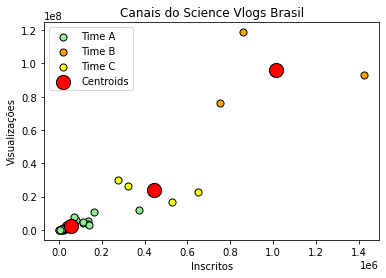

In [14]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='Time A'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='Time B'
)

plt.scatter(
    x[clusters == 2, 0], x[clusters == 2, 1],
    s=50, c='Yellow',
    edgecolor='black',
    label='Time C'
)

# plot the centroids

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red',
    edgecolor='black',
    label='Centroids'
)

plt.title('Canais do Science Vlogs Brasil')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

# Clusterização Hierárquica

Dendrograma

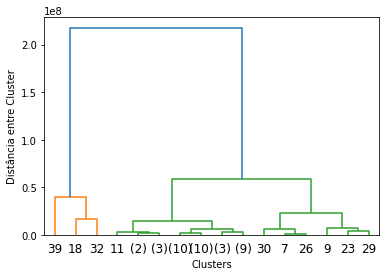

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(x, 'ward'), truncate_mode = 'level', p = 4)
plt.xlabel('Clusters')
plt.ylabel('Distância entre Cluster')
plt.show()

# sobre o linkage: aplica o algoritmo de clusterização hierarquica dentro da scipy

Algoritmo de clusterização hierárquica

In [16]:
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward')
clusters = modelo.fit_predict(x)
clusters

df['Cluster_Hier'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster,Cluster_Hier
0,Site Arqueologia Egípcia,13438.0,406590.0,0,0
1,Terra Negra,35241.0,868235.0,0,0
2,Frank Jaava,31680.0,2856508.0,0,0
3,Dispersciência,25100.0,150000.0,0,0
4,Olá Ciência,32788.0,1575456.0,0,0


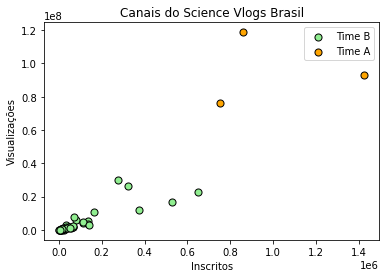

In [17]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='Time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='Time A'
)

plt.title('Canais do Science Vlogs Brasil')
plt.xlabel('Inscritos')
plt.ylabel('Visualizações')
plt.legend()
plt.show()

Obtivemos resultados muito semelhantes a análise feita com K-means, considerando k = 2